<a href="https://colab.research.google.com/github/chibuzorc/data_analysis/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Classifier for Breast Cancer Prediction

The goal of this assignment is to build and fine-tune a Random Forest Classifier to predict whether a breast cancer tumor is benign or malignant using the provided dataset. The steps include data loading, exploration, preprocessing, model training, hyperparameter tuning, and evaluation.

Data Loading and Exploration
We begin by loading the dataset from Google Drive into a Pandas DataFrame and exploring its structure and contents. The dataset contains records with various features extracted from fine needle aspirate (FNA) of a breast mass.

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/IT7103/breast_cancer.csv')

In [ ]:
# Show data information and information from the first few columns
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        699 non-null    int64  
 1   ClumpThickness            699 non-null    int64  
 2   UniformityOfCellSize      699 non-null    int64  
 3   UniformityOfCellShape     699 non-null    int64  
 4   MarginalAdhesion          699 non-null    int64  
 5   SingleEpithelialCellSize  699 non-null    int64  
 6   BareNuclei                699 non-null    int64  
 7   BlandChromatin            699 non-null    int64  
 8   NormalNucleoli            699 non-null    int64  
 9   Mitoses                   699 non-null    int64  
 10  Class                     699 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB
None
        ID  ClumpThickness  UniformityOfCellSize  UniformityOfCellShape  \
0  1000025               5                     1

The dataset is a collection of 699 recorded cases related to breast cancer diagnosis, with about 34.5% of the cases being malignant. Each record in the dataset represents a patient's case with various features extracted from fine needle aspirate (FNA) of a breast mass. The dataset is clean and contains numeric values in all columns.

Columns Description:
ID (Case number): A unique identifier for each patient's case. This column is not used for model training.

ClumpThickness: Measures the thickness of cell clumps observed under a microscope. Values range from 1 to 10, with higher values indicating thicker clumps.

UniformityOfCellSize: Assesses the uniformity in size of the cells in the sample. Values range from 1 to 10, where higher values indicate more variability in cell size.

UniformityOfCellShape: Evaluates the uniformity in the shape of the cells in the sample. Values range from 1 to 10, with higher values indicating more variability in cell shape.

MarginalAdhesion: Measures how closely the cells stick to each other. Values range from 1 to 10, with higher values indicating higher adhesion.

SingleEpithelialCellSize: Indicates the size of the single epithelial cells. Values range from 1 to 10, with higher values indicating larger cell size.

BareNuclei: Represents the number of cells that have bare nuclei (nuclei that are not surrounded by cytoplasm). Values range from 1 to 10.

BlandChromatin: Evaluates the texture of the chromatin in the cell nuclei. Values range from 1 to 10, with higher values indicating a more coarse texture.

NormalNucleoli: Measures the presence and size of nucleoli in the cells. Values range from 1 to 10, with higher values indicating more prominent nucleoli.

Mitoses: Counts the number of mitotic figures (cells in the process of division) observed. Values range from 1 to 10, with higher values indicating more mitoses.

Class (Target): The target variable indicating whether the tumor is benign (0) or malignant (1).

This dataset is used for training machine learning models to predict the class of a tumor based on the provided features. The features provide crucial information that helps in diagnosing whether a breast mass is benign or malignant.

Preliminary Analysis

I visualize the data to understand the distributions and relationships between the features and the target variable.

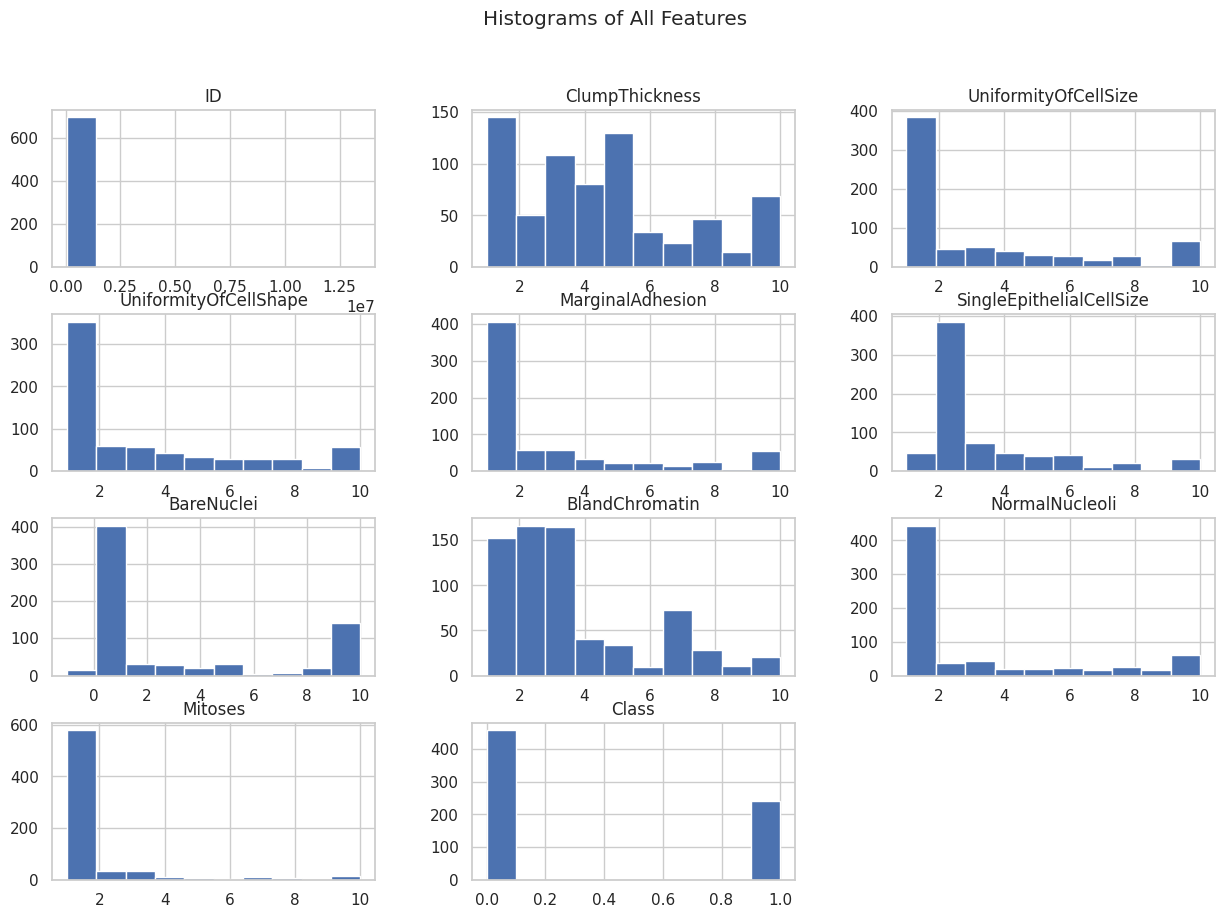

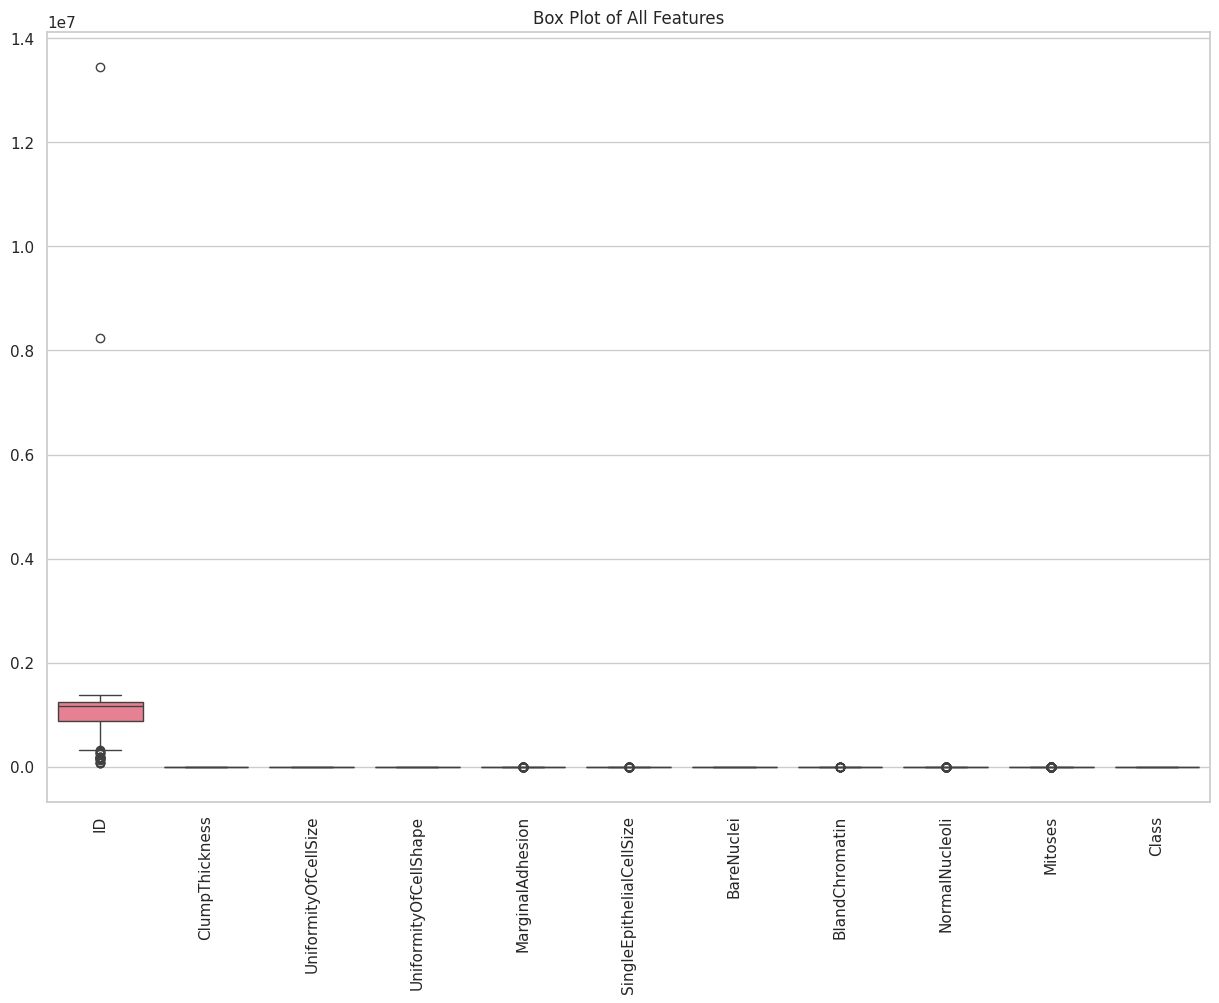

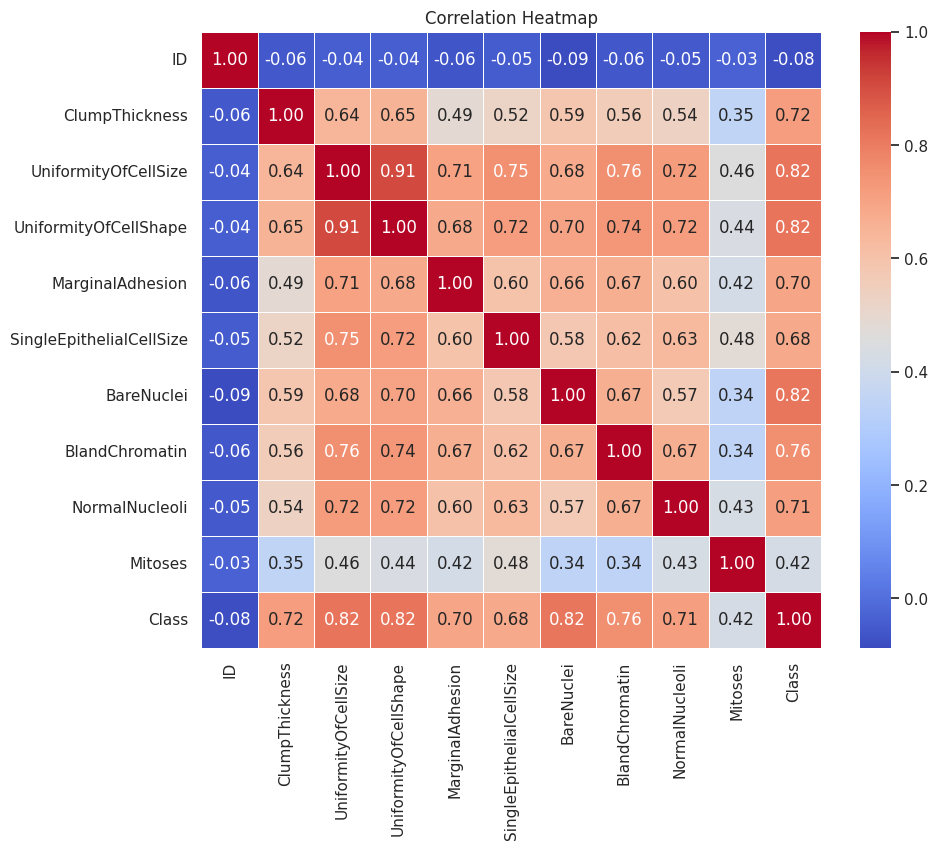

In [ ]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Histograms
data.hist(bins=10, figsize=(15, 10))
plt.suptitle("Histograms of All Features")
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Box Plot of All Features")
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



Data Preprocessing

Data is prepared for modeling by separating the features and target variable, splitting the dataset into training and testing sets, and standardizing the features.

In [ ]:
# Separate the features and target variable
X = data.drop(columns=['ID', 'Class'])
y = data['Class']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display the shapes of the training and testing sets
print("Training set shape (features):", X_train_scaled.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (features):", X_test_scaled.shape)
print("Testing set shape (target):", y_test.shape)

Training set shape (features): (559, 9)
Training set shape (target): (559,)
Testing set shape (features): (140, 9)
Testing set shape (target): (140,)


In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

Model Training and Hyperparameter Tuning

We initialize the Random Forest classifier and perform hyperparameter tuning using GridSearchCV to find the best combination of parameters.

Model Fine-Tuning Process

Random Forest Classifier:
I used a Random Forest Classifier to predict whether a breast cancer tumor is benign or malignant. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks.

Hyperparameter Tuning:
To optimize the performance of our Random Forest model, I performed hyperparameter tuning using GridSearchCV. The key hyperparameters we tuned included:

n_estimators: The number of trees in the forest. I tested values of 50, 100, and 200.
max_depth: The maximum depth of the tree. I tested values of None, 10, 20, and 30.
min_samples_split: The minimum number of samples required to split an internal node. We tested values of 2, 5, and 10.
min_samples_leaf: The minimum number of samples required to be at a leaf node. I tested values of 1, 2, and 4.

GridSearchCV:
I used GridSearchCV to perform an exhaustive search over the specified parameter values. GridSearchCV evaluated the performance of each combination of hyperparameters using 5-fold cross-validation and selected the best set of parameters based on accuracy.



In [ ]:
# Define a parameter grid for fine-tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

In [ ]:
# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [ ]:
# Predict on the training data
y_train_pred = best_rf_classifier.predict(X_train_scaled)

In [ ]:
# Predict on the testing data
y_test_pred = best_rf_classifier.predict(X_test_scaled)

In [ ]:
# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
# Display the best parameters and accuracies
print("Best Parameters:", best_params)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9803220035778175
Testing Accuracy: 0.9714285714285714


The Random Forest Classifier achieved the following accuracies:

Training Accuracy: 0.9803220035778175

Testing Accuracy: 0.9714285714285714

The model performed well on the testing data and training data, indicating its effectiveness in predicting whether a breast cancer tumor is benign or malignant. The hyperparameter tuning process using GridSearchCV helped in optimizing the model's performance.

For future iterations, we could explore handling target outliers through removal or other methods to potentially improve the model's performance further. Additionally, we may consider feature engineering techniques such as polynomial features or interaction terms to capture more complex relationships in the data.